In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import io
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [ ]:
data_to_load = files.upload()

Saving TB&PN_train.xlsx to TB&PN_train.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(data_to_load['TB&PN_train.xlsx']))
data = df.copy()

In [ ]:
data.tail(30)

,NO,R,G,B,SpO2,C,Flex,Class
0,1,183.000000,132.000000,123.000000,94,36.300000,40,Normal
1,2,183.000000,141.000000,143.000000,95,36.300000,40,Normal
2,3,190.000000,180.000000,172.000000,96,36.500000,43,Normal
3,4,190.000000,139.000000,134.000000,96,36.700000,38,Normal
4,5,192.000000,171.000000,181.000000,96,36.700000,40,Normal
5,6,194.000000,154.000000,154.000000,96,36.400000,37,Normal
6,7,195.000000,183.000000,179.000000,95,36.300000,41,Normal
7,8,205.000000,175.000000,173.000000,94,36.300000,40,Normal
8,9,205.916230,216.646707,211.612121,97,36.300000,50,Normal
9,10,206.952880,183.215569,182.866667,95,36.300000,38,Normal


In [ ]:
#Affichage du nombre des valeurs nulles par colonnes
data.isnull().sum()

NO       0
R        0
G        0
B        0
SpO2     0
C        0
Flex     0
Class    0
dtype: int64

In [ ]:
#description des données
data.describe()

,NO,R,G,B,SpO2,C,Flex
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,214.088251,188.165162,187.830663,94.433333,36.790276,34.100000
std,8.803408,16.972114,29.735954,35.549653,1.222866,0.480371,10.219488
min,1.000000,183.000000,132.000000,123.000000,92.000000,36.200000,22.000000
25%,8.250000,205.229058,172.414474,171.778523,94.000000,36.325000,25.250000
50%,15.500000,216.500000,183.107784,181.933333,94.000000,36.700000,32.000000
75%,22.750000,226.965847,203.250000,207.500000,95.000000,36.997622,40.000000
max,30.000000,241.606061,240.540000,272.141844,97.000000,37.916575,63.000000


The Number of Samples which have class 0 is :  13
The Number of Samples which have class 1 is :  8
The Number of Samples which have class 2 is :  9


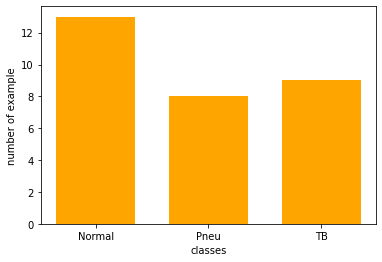

In [ ]:
#Nombre d'observations par classe
a=np.unique(data[['Class']],return_counts=True)
a = np.array(a)
print('The Number of Samples which have class 0 is : ', a[:,0][1])
print('The Number of Samples which have class 1 is : ', a[:,1][1])
print('The Number of Samples which have class 2 is : ', a[:,2][1])
plt.bar(a[0],a[1],width=0.7,color="orange")
plt.xlabel("classes")
plt.ylabel("number of example")
plt.show()

In [ ]:
#Encodage de la classe y
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
target = labelencoder.fit_transform(data['Class'])

In [ ]:
#spécification des features
X=data.iloc[:,0:7]

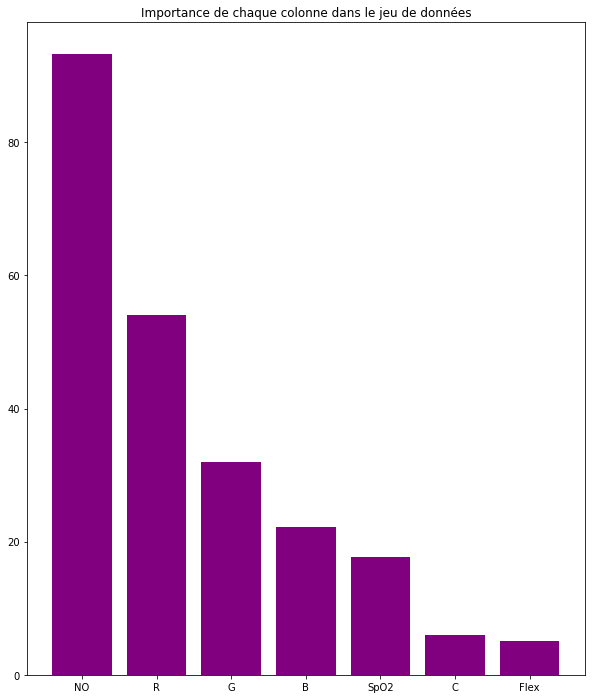

In [ ]:
#Importance de chaque colonne
fs = SelectKBest(score_func = f_classif, k = 6)
features_selected = fs.fit_transform(X, target)
chi_df = pd.DataFrame(fs.scores_, columns= ['Score'])
chi_df['colonnes']=data.columns[0:7]
plt.figure(figsize=(10, 12))
plt.bar(chi_df['colonnes'], chi_df['Score'].sort_values(ascending=False), color = 'purple')
plt.title('Importance de chaque colonne dans le jeu de données')
plt.show()

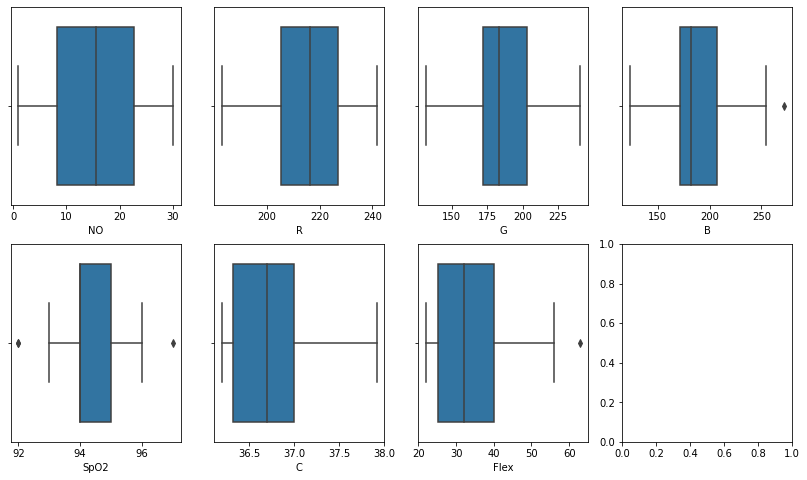

In [ ]:
#Affichage des valeurs abbérantes 
f ,ax =plt.subplots(2,4,figsize=(14,8))
sns.boxplot(x=data['NO'] , ax=ax[0,0])
sns.boxplot(x=data['R'],ax=ax[0,1])
sns.boxplot(x=data['G'],ax=ax[0,2])
sns.boxplot(x=data['B'],ax=ax[0,3])
sns.boxplot(x=data['SpO2'],ax=ax[1,0])
sns.boxplot(x=data['C'],ax=ax[1,1])
sns.boxplot(x=data['Flex'],ax=ax[1,2])


In [ ]:
#Standardisation des données
columns = X.columns
mins = X.min()
maxs = X.max()
print('Before Scaling : ')

for i in range(0,6):
    print(f'Column name : {columns[i]} , values between {mins[i]} and {maxs[i]}')
print('\n')
standardscaler=StandardScaler()
X = standardscaler.fit_transform(X)
X=pd.DataFrame(X)
mins = X.min()
maxs = X.max()
print(f'After Scaling : ')
for i in range(0,6):
    print(f'Column name : {columns[i]} , values between {mins[i]} and {maxs[i]}')


Before Scaling : 
Column name : NO , values between 1.0 and 30.0
Column name : R , values between 183.0 and 241.6060606060606
Column name : G , values between 132.0 and 240.54000000000002
Column name : B , values between 123.0 and 272.1418439716312
Column name : SpO2 , values between 92.0 and 97.0
Column name : C , values between 36.2 and 37.91657458563535


After Scaling : 
Column name : NO , values between -1.6752467319482305 and 1.6752467319482305
Column name : R , values between -1.8630390872963607 and 1.6490717309480383
Column name : G , values between -1.9210857938789982 and 1.7914407164924673
Column name : B , values between -1.8548411702192356 and 2.4121895646253546
Column name : SpO2 , values between -2.023877451455214 and 2.134774846055493
Column name : C , values between -1.2497986437290953 and 2.384727057333754


In [ ]:
data_to_load = files.upload()

Saving TB&PN_test.xlsx to TB&PN_test.xlsx


In [ ]:
#données de test
df_test = pd.read_excel(io.BytesIO(data_to_load['TB&PN_test.xlsx']))
data_test = df_test.copy()

In [ ]:
data_test.shape

(14, 8)

In [ ]:
#encodage de l'étiquette pour les données de test
labelencoder = LabelEncoder()
target_test = labelencoder.fit_transform(data_test['Class'])

In [ ]:
#Scalling des données de test 
X_test = data_test.iloc[:,0:7]
standardscaler=StandardScaler()
X_test = standardscaler.fit_transform(X_test)
X_test=pd.DataFrame(X_test)
y_test = target_test

In [ ]:
#spécification de x_train et y_train
X_train = X
y_train = target

In [ ]:
#Gridsearch KNN
param_grid = {'n_neighbors' : np.arange(1,50)}
knn =  KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train,y_train)
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

The best paramter we have is: {'n_neighbors': 3}


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train , y_train)
pred = knn.predict(X_test)
KNN_Accuracy = accuracy_score(pred , y_test)
print('Accuracy : ' , KNN_Accuracy )

Accuracy :  0.9285714285714286


In [ ]:
cr_Knn = classification_report(y_test, pred)
print(cr_Knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.92      0.92      0.90        14
weighted avg       0.95      0.93      0.93        14



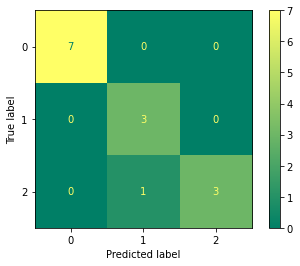

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap='summer')  
plt.show()

In [ ]:
#Naive bayes classifier
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train , y_train)
y_pred = naive_bayes_classifier.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_pred , y_test)
print('Naive Bayes Classifier Accuracy : ', naive_bayes_accuracy)


Naive Bayes Classifier Accuracy :  0.9285714285714286


In [ ]:
y_prrd = naive_bayes_classifier.predict(X_test)
print(classification_report(y_test, y_prrd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4

    accuracy                           0.93        14
   macro avg       0.92      0.92      0.90        14
weighted avg       0.95      0.93      0.93        14



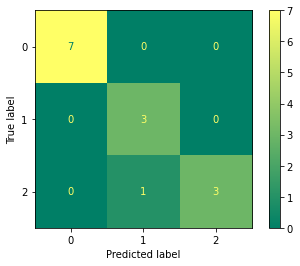

In [ ]:
plot_confusion_matrix(naive_bayes_classifier, X_test, y_test, cmap='summer')  
plt.show()

In [ ]:
#Decision Tree
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
Decision_Tree_Accuracy = accuracy_score(y_pred , y_test)
print('Accuracy : ', Decision_Tree_Accuracy)

Accuracy :  0.9285714285714286


In [ ]:
y_prrd = model.predict(X_test)
print(classification_report(y_test, y_prrd))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00         3
           2       0.80      1.00      0.89         4

    accuracy                           0.93        14
   macro avg       0.93      0.95      0.94        14
weighted avg       0.94      0.93      0.93        14



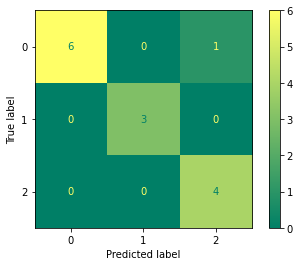

In [ ]:
plot_confusion_matrix(model, X_test, y_test, cmap='summer')  
plt.show()

In [ ]:
"""from tabgan.sampler import GANGenerator
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

gen_x, gen_y = GANGenerator(gen_x_times=1.1, cat_cols=None,
           bot_filter_quantile=0.001, top_filter_quantile=0.999, \
              is_post_process=True,
           adversarial_model_params={
               "metrics": "rmse", "max_depth": 2, "max_bin": 100, 
               "learning_rate": 0.02, "random_state": \
                42, "n_estimators": 500,
           }, pregeneration_frac=2, only_generated_data=False,\
           gan_params = {"batch_size": 500, "patience": 25, \
          "epochs" : 500,}).generate_data_pipe(X_train, y_train,\
          X_test, deep_copy=True, only_adversarial=False, \
          use_adversarial=True)"""

OSError: dlopen(/Users/mac/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/mac/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: image not found